In [27]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
%matplotlib inline
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score , cross_val_predict
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()


In [3]:
df.shape

(8147, 13)

In [4]:
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)
print(offset)
# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]
print(X_train.shape)
# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]
print(X_test.shape)

7332
(7332, 16)
(815, 16)


In [15]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


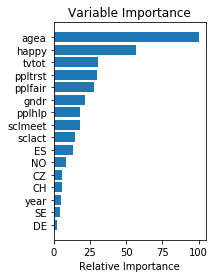

In [23]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# DRILL: Improve this gradient boost model

In [5]:
from sklearn.model_selection import GridSearchCV

In [11]:
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

In [31]:
param_test1 = {'n_estimators':np.arange(100,1100,100),
               'max_depth':[3,4,5,6,7,None],
               'learning_rate': [0.03, 0.1, 0.3],
               'loss': ['deviance'],
               'subsample':[0.6,0.7,0.75,0.8,0.85,0.9, 1],
              'max_features':range(2,10,2)}
print(param_test1)

{'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]), 'max_depth': [3, 4, 5, 6, 7, None], 'learning_rate': [0.03, 0.1, 0.3], 'loss': ['deviance'], 'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1], 'max_features': range(2, 10, 2)}


This algorithm was running for a very long time...So I cancelled it in between.
# What is the proper way of doing it ?

In [33]:
start_time = datetime.now() 
gsearch1 = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(learning_rate=0.1,random_state=10), 
    param_grid = param_test1,  cv=5)
gsearch1.fit(X_train, y_train)
#scores = cross_val_score(gsearch1,X,y ,cv=10)
y_pred = cross_val_predict(gsearch1,X,y ,cv=10)
conf_mat = confusion_matrix(y,y_pred)
print(conf_mat)
print('type 1 ', conf_mat[0,1] / (conf_mat[0,0]+conf_mat[0,1]) )
print('type 2 ', conf_mat[1,0] / (conf_mat[1,0]+conf_mat[1,1]) )
#print(gsearch1.grid_scores_)
print('\nBest parameters {} '.format(gsearch1.best_params_))
#print('\nCV Gridsearch Accuracy: %.2f +/- %.2f' % (scores.mean(), scores.std()))
#print("\nDuration : ", (datetime.now() - start_time))

KeyboardInterrupt: 